In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Social_Media.csv')

# Check the structure of the dataset
data.info()

# Check for missing values
missing_values = data.isnull().sum()
missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   UserID                    1000 non-null   int64 
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   object
 3   Location                  1000 non-null   object
 4   Income                    1000 non-null   int64 
 5   Debt                      1000 non-null   bool  
 6   Owns Property             1000 non-null   bool  
 7   Profession                1000 non-null   object
 8   Demographics              1000 non-null   object
 9   Platform                  1000 non-null   object
 10  Total Time Spent          1000 non-null   int64 
 11  Number of Sessions        1000 non-null   int64 
 12  Video ID                  1000 non-null   int64 
 13  Video Category            1000 non-null   object
 14  Video Length             

UserID                      0
Age                         0
Gender                      0
Location                    0
Income                      0
Debt                        0
Owns Property               0
Profession                  0
Demographics                0
Platform                    0
Total Time Spent            0
Number of Sessions          0
Video ID                    0
Video Category              0
Video Length                0
Engagement                  0
Importance Score            0
Time Spent On Video         0
Number of Videos Watched    0
Scroll Rate                 0
Frequency                   0
ProductivityLoss            0
Satisfaction                0
Watch Reason                0
DeviceType                  0
OS                          0
Watch Time                  0
Self Control                0
Addiction Level             0
CurrentActivity             0
ConnectionType              0
dtype: int64

What is the average time spent on social media per user?

In [2]:
# Calculate average time spent
average_time_spent = data['Total Time Spent'].mean()
print(f"Average time spent on social media: {average_time_spent:.2f} minutes")


Average time spent on social media: 151.41 minutes


How does the distribution of time spent on social media look?

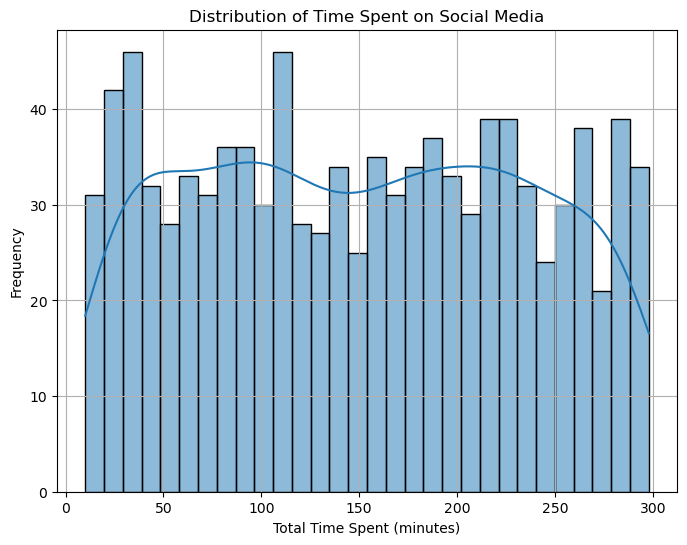

Skewness: 0.03221690225689901, Kurtosis: -1.20795583723777


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Total Time Spent'], bins=30, kde=True)
plt.title('Distribution of Time Spent on Social Media')
plt.xlabel('Total Time Spent (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Check for skewness and kurtosis
time_spent_skewness = data['Total Time Spent'].skew()
time_spent_kurtosis = data['Total Time Spent'].kurt()
print(f"Skewness: {time_spent_skewness}, Kurtosis: {time_spent_kurtosis}")


Is productivity loss normally distributed?

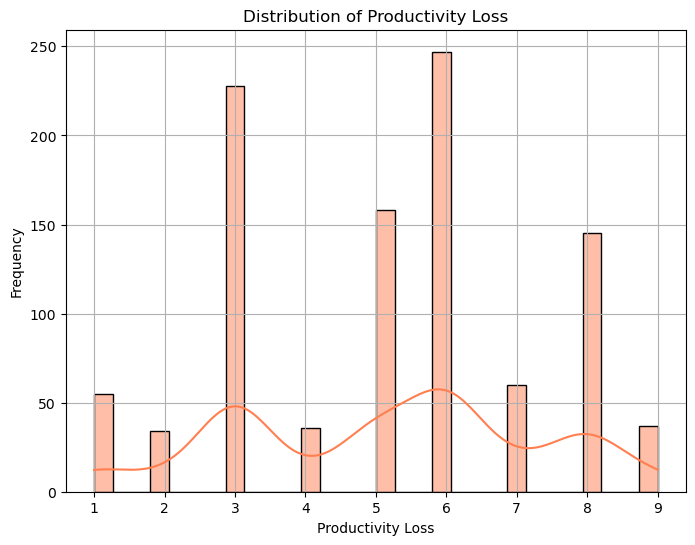

Skewness: -0.11818554716890513, Kurtosis: -0.8717151101885618


In [4]:
# Plot the distribution of productivity loss
plt.figure(figsize=(8, 6))
sns.histplot(data['ProductivityLoss'], bins=30, kde=True, color='coral')
plt.title('Distribution of Productivity Loss')
plt.xlabel('Productivity Loss')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Check for skewness and kurtosis
prod_loss_skewness = data['ProductivityLoss'].skew()
prod_loss_kurtosis = data['ProductivityLoss'].kurt()
print(f"Skewness: {prod_loss_skewness}, Kurtosis: {prod_loss_kurtosis}")


Is there a correlation between time spent on social media and productivity loss?

In [5]:
# Calculate the correlation between time spent and productivity loss
correlation = data['Total Time Spent'].corr(data['ProductivityLoss'])
print(f"Correlation between time spent and productivity loss: {correlation:.2f}")


Correlation between time spent and productivity loss: -0.01


How does productivity differ between heavy and light social media users?
Define heavy users as those above the 75th percentile and light users as those below the 25th percentile.

Mean productivity loss for heavy users: 5.068548387096774
Mean productivity loss for light users: 5.1687242798353905


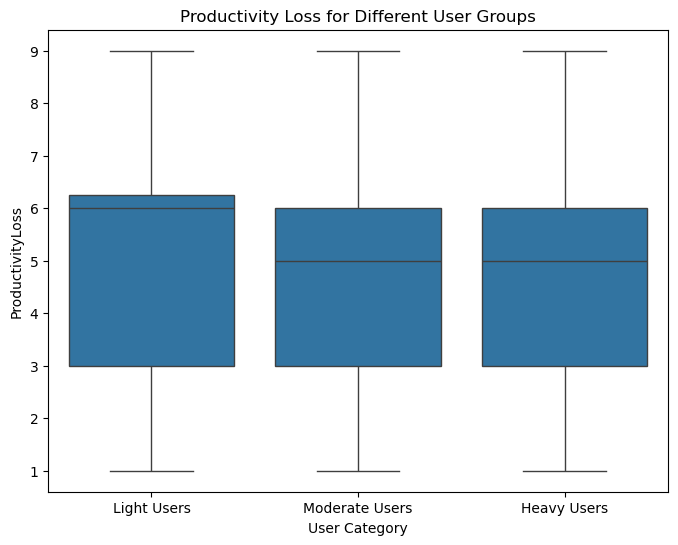

In [7]:
# Define heavy and light users based on percentiles
heavy_users = data[data['Total Time Spent'] > data['Total Time Spent'].quantile(0.75)]
light_users = data[data['Total Time Spent'] < data['Total Time Spent'].quantile(0.25)]

# Calculate mean productivity loss for both groups
mean_prod_loss_heavy = heavy_users['ProductivityLoss'].mean()
mean_prod_loss_light = light_users['ProductivityLoss'].mean()

print(f"Mean productivity loss for heavy users: {mean_prod_loss_heavy}")
print(f"Mean productivity loss for light users: {mean_prod_loss_light}")

# Visualize the difference
plt.figure(figsize=(8,6))
sns.boxplot(x="User Category", y="ProductivityLoss", data=data.assign(
    **{'User Category': pd.cut(data['Total Time Spent'], 
                               bins=[-1, data['Total Time Spent'].quantile(0.25), 
                                     data['Total Time Spent'].quantile(0.75), float('inf')], 
                               labels=["Light Users", "Moderate Users", "Heavy Users"])}))
plt.title('Productivity Loss for Different User Groups')
plt.show()
